In [1]:
import numpy as np
import galsim

import matplotlib.pyplot as plt
%matplotlib inline

- OpticalScreenList.makePSF
- PhaseScreenPSF

In [2]:
# Test
screen1 = galsim.OpticalScreen(diam=4.0, defocus=0.4)

a_nmrs = np.zeros((10, 10), dtype=np.float64)
a_nmrs[4, 1] = 0.4 # defocus
fov_radius = 1.0 * galsim.degrees
screen2 = galsim.OpticalScreenField(diam=4.0, a_nmrs=a_nmrs, fov_radius=fov_radius)

psf1 = galsim.PhaseScreenList(screen1).makePSF(diam=4.0, lam=500.0)
psf2 = galsim.PhaseScreenList(screen2).makePSF(diam=4.0, lam=500.0)

img1 = psf1.drawImage()
img2 = psf2.drawImage()

np.testing.assert_array_equal(
        psf1.img.array, psf2.img.array,
        "Field dependent optical screen does not match fixed optical screen in the right limit")

In [3]:
screen2.getAberrations(0., 0.)

[array(0.0),
 array(0.0),
 array(0.0),
 array(0.0),
 array(0.4),
 array(0.0),
 array(0.0),
 array(0.0),
 array(0.0),
 array(0.0)]

(192, 192)


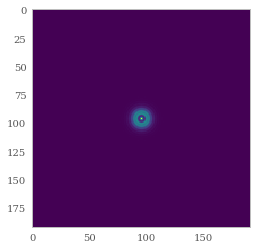

In [4]:
print psf1.img.array.shape
plt.imshow(psf1.img.array)

(192, 192)


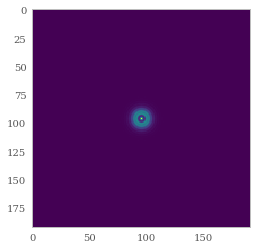

In [5]:
print psf2.img.array.shape
plt.imshow(psf2.img.array)

## Loop over aberrations

In [18]:
aberrations = np.zeros(12, dtype=np.float64)
aberrations[7] = 1.
screen1 = galsim.OpticalScreen(diam=4.0, aberrations=aberrations)

a_nmrs = np.zeros((12, 10), dtype=np.float64)
a_nmrs[7, 1] = 1.
fov_radius = 1.0 * galsim.degrees
screen2 = galsim.OpticalScreenField(diam=4.0, a_nmrs=a_nmrs, fov_radius=fov_radius)

psf1 = galsim.PhaseScreenList(screen1).makePSF(diam=4.0, lam=500.0)
psf2 = galsim.PhaseScreenList(screen2).makePSF(diam=4.0, lam=500.0)

img1 = psf1.drawImage()
img2 = psf2.drawImage()

np.testing.assert_array_equal(
        psf1.img.array, psf2.img.array,
        "Field dependent optical screen does not match fixed optical screen in the right limit")

(192, 192)


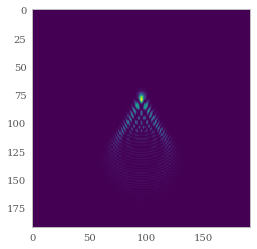

In [19]:
print psf1.img.array.shape
plt.imshow(psf1.img.array)

(192, 192)


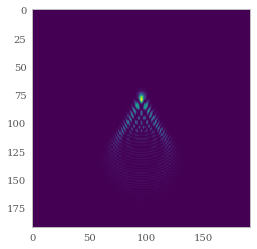

In [20]:
print psf2.img.array.shape
plt.imshow(psf2.img.array)

In [8]:
for i in xrange(11):
    print "----- {:d} -----".format(i)
    aberrations = np.zeros(12, dtype=np.float64)
    aberrations[i+1] = 0.5
    screen1 = galsim.OpticalScreen(diam=4.0, aberrations=aberrations)

    a_nmrs = np.zeros((12, 10), dtype=np.float64)
    a_nmrs[i+1, 1] = 0.5
    fov_radius = 1.0 * galsim.degrees
    screen2 = galsim.OpticalScreenField(diam=4.0, a_nmrs=a_nmrs, fov_radius=fov_radius)

    psf1 = galsim.PhaseScreenList(screen1).makePSF(diam=4.0, lam=500.0)
    psf2 = galsim.PhaseScreenList(screen2).makePSF(diam=4.0, lam=500.0)

    img1 = psf1.drawImage()
    img2 = psf2.drawImage()
    
    np.testing.assert_array_equal(
            psf1.img.array, psf2.img.array,
            "Field dependent optical screen does not match fixed optical screen in the right limit")

----- 0 -----
----- 1 -----
----- 2 -----
----- 3 -----
----- 4 -----
----- 5 -----
----- 6 -----
----- 7 -----
----- 8 -----
----- 9 -----
----- 10 -----


## Testing field dependence

In [93]:
fov_radius = 3.5 * galsim.degrees
theta = (1.5*galsim.arcmin, 0.0*galsim.arcmin)

a_nmrs_val = 120.

r = (np.sqrt(theta[0].tan()**2 + theta[1].tan()**2)) / fov_radius.tan()
Z1 = 2 * r

aberrations = np.zeros(12, dtype=np.float64)
aberrations[9] = a_nmrs_val * Z1
screen1 = galsim.OpticalScreen(diam=4.0, aberrations=aberrations)

a_nmrs = np.zeros((12, 10), dtype=np.float64)
a_nmrs[9, 2] = a_nmrs_val
screen2 = galsim.OpticalScreenField(diam=4.0, a_nmrs=a_nmrs, fov_radius=fov_radius)

psf1 = galsim.PhaseScreenList(screen1).makePSF(diam=4.0, lam=500.0,
                                               theta=theta)
psf2 = galsim.PhaseScreenList(screen2).makePSF(diam=4.0, lam=500.0,
                                               theta=theta)

img1 = psf1.drawImage()
img2 = psf2.drawImage()

np.testing.assert_array_equal(
        psf1.img.array, psf2.img.array,
        "Field dependent optical screen does not match fixed optical screen in the right limit")

In [94]:
print aberrations
print screen2.getAberrations(theta[0].tan(), theta[1].tan())

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          1.71215297  0.          0.        ]
[array(0.0), array(0.0), array(0.0), array(0.0), array(0.0), array(0.0), array(0.0), array(0.0), array(0.0), array(1.7121529703555745), array(0.0), array(0.0)]


(192, 192)


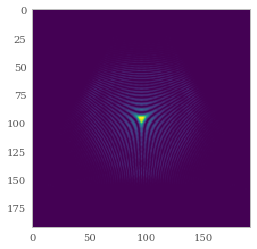

In [95]:
print psf1.img.array.shape
plt.imshow(psf1.img.array)

(192, 192)


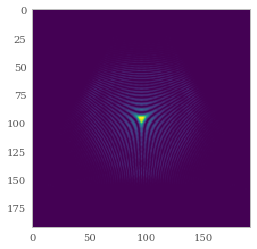

In [96]:
print psf2.img.array.shape
plt.imshow(psf2.img.array)